# **Lead Calculation with Rule-Based Classification**

## Business Problem

A game company wants to create new level-based customer definitions (personas) by using some features of its customers, and to create segments according to these new customer definitions and to estimate how much the new customers can earn on average according to these segments.

For example: It is desired to determine how much a 25-year-old male user from Turkey who is an IOS user can earn on average.


## Dataset Story

Persona.csv dataset contains the prices of the products sold by an international game company and some demographic information of the users who buy these products. The data set consists of records created in each sales transaction. This means that the table is not deduplicated. In other words, a user with certain demographic characteristics may have made more than one purchase.

* Price: Customer's spending amount
* Source: The type of device the customer is connecting to
* Sex: Gender of the client
* Country: Country of the customer
* Age: Customer's age


### Before Application

* PRICE SOURCE SEX COUNTRY AGE
* 0 39 android male bra 17
* 1 39 android male bra 17
* 2 49 android male bra 17
* 3 29 android male tour 17
* 4 49 android male tur 17

### After Application

* customers_level_based PRICE SEGMENT
* 0 BRA_ANDROID_FEMALE_0_18 1139.800000 A
* 1 BRA_ANDROID_FEMALE_19_23 1070.60000 A
* 2 BRA_ANDROID_FEMALE_24_30 508.142857 A
* 3 BRA_ANDROID_FEMALE_31_40 233.166667 C
* 4 BRA_ANDROID_FEMALE_41_66 236.666667 C

## PROJECT TASKS

In [1]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## TASK 1: Answer the following questions.

### Question 1: Read the dataset and show the general information about the dataset.

In [2]:
# reading the dataset
df = pd.read_csv('/kaggle/input/new-persona-dataset/persona.csv')
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [3]:
def check_df(dataframe, head=5):
    print('##############################')
    print(dataframe.head(head))
    print('\n##############################')
    print(dataframe.tail(head))
    print('\n##############################')
    print(dataframe.shape)
    print('\n##############################')
    print(dataframe.info())
    print('\n##############################')
    print(dataframe.columns)
    print('\n##############################')
    print(dataframe.isnull().values.any())
    print('\n##############################')
    print(dataframe.isnull().sum())
    print('\n##############################')
    print(dataframe.describe([0.05, 0.1, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99, 1]).T)

check_df(df)

##############################
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17

##############################
      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31

##############################
(5000, 5)

##############################
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object

### Question 2: How many unique SOURCE are there? What are their frequencies?

In [4]:
df['SOURCE'].nunique()  # 2

2

In [5]:
df['SOURCE'].unique()  # array(['android', 'ios'], dtype=object)

array(['android', 'ios'], dtype=object)

In [6]:
df['SOURCE'].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

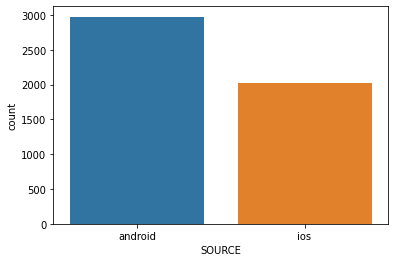

In [7]:
sns.countplot(x=df['SOURCE'])
plt.show(block=True)

### Question 3: How many unique PRICEs are there?

In [8]:
df['PRICE'].nunique()    # 6

6

In [9]:
df['PRICE'].unique() 

array([39, 49, 29, 19, 59,  9])

### Question 4: How many sales were made from which PRICE?

In [10]:
df['PRICE'].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

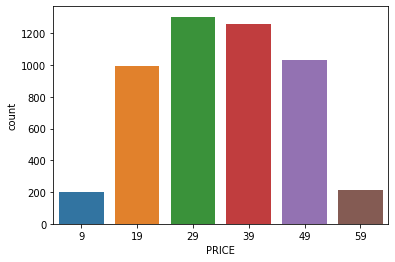

In [11]:
sns.countplot(x=df['PRICE'])
plt.show(block=True)

### Question 5: How many sales were made from which country?

In [12]:
df['COUNTRY'].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

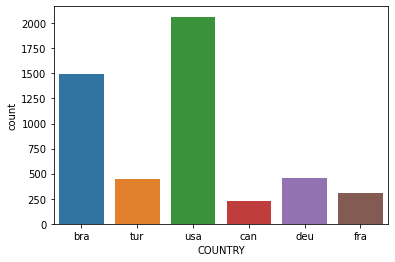

In [13]:
sns.countplot(x=df['COUNTRY'])
plt.show(block=True)

### Question 6: How much was earned in total from sales by country?

In [14]:
df.groupby('COUNTRY').agg({'PRICE': 'sum'})

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


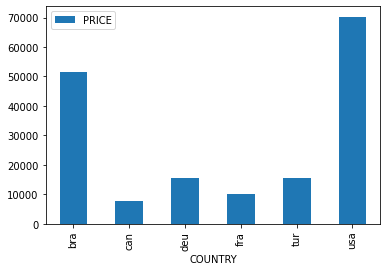

In [15]:
df.groupby('COUNTRY').agg({'PRICE': 'sum'}).plot(kind='bar');

### Question 7: What are the sales numbers according to SOURCE types?

In [16]:
df.groupby('SOURCE').agg({'PRICE': 'count'})

,PRICE
SOURCE,
android,2974
ios,2026


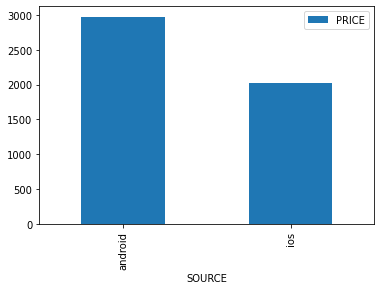

In [17]:
df.groupby('SOURCE').agg({'PRICE': 'count'}).plot(kind='bar');

### Question 8: What are the PRICE averages by country?

In [18]:
df.groupby('COUNTRY').agg({'PRICE': 'mean'})

,PRICE
COUNTRY,
bra,34.33
can,33.61
deu,34.03
fra,33.59
tur,34.79
usa,34.01


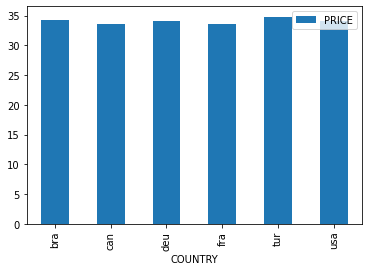

In [19]:
df.groupby('COUNTRY').agg({'PRICE': 'mean'}).plot(kind='bar');

### Question 9: What are the PRICE averages according to SOURCEs?

In [20]:
df.groupby('SOURCE').agg({'PRICE': 'mean'})

,PRICE
SOURCE,
android,34.17
ios,34.07


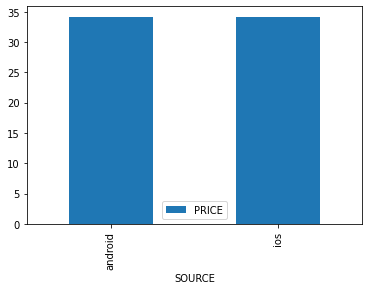

In [21]:
df.groupby('SOURCE').agg({'PRICE': 'mean'}).plot(kind='bar');

### Question 10: What are the PRICE averages in the COUNTRY-SOURCE breakdown?

In [22]:
df.groupby(['COUNTRY', 'SOURCE']).agg({'PRICE': 'mean'})

PRICE
COUNTRY SOURCE        
bra     android  34.39
        ios      34.22
can     android  33.33
        ios      33.95
deu     android  33.87
        ios      34.27
fra     android  34.31
        ios      32.78
tur     android  36.23
        ios      33.27
usa     android  33.76
        ios      34.37

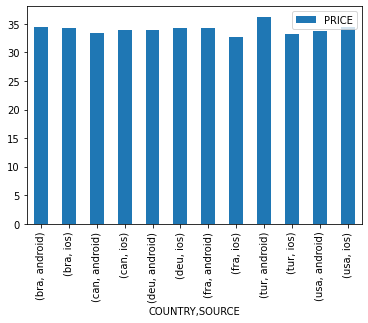

In [23]:
df.groupby(['COUNTRY', 'SOURCE']).agg({'PRICE': 'mean'}).plot(kind='bar');

## TASK 2: What are the average earnings in breakdown of COUNTRY, SOURCE, SEX, AGE?

In [24]:
df.groupby(['COUNTRY', 'SOURCE', 'SEX', 'AGE']).agg({'PRICE': 'mean'})

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android female 15   38.71
                       16   35.94
                       17   35.67
                       18   32.26
                       19   35.21
...                           ...
usa     ios     male   42   30.25
                       50   39.00
                       53   34.00
                       55   29.00
                       59   46.50

[348 rows x 1 columns]

## TASK 3: Sort the output by PRICE.

* To better see the output from the previous question, apply the sort_values method to PRICE in descending order.
* Save the output as age_df.

In [25]:
age_df = df.groupby(['COUNTRY', 'SOURCE', 'SEX', 'AGE']).agg({'PRICE': 'mean'}).sort_values('PRICE', ascending=False)
age_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.00
usa,android,male,36,59.00
fra,android,female,24,59.00
usa,ios,male,32,54.00
deu,android,female,36,49.00


### TASK 4: Convert the names in the index to variable names.
* All variables except PRICE in the output of the third question are index names.
* Convert these names to variable names.
* Hint: reset_index()
* agg_df.reset_index(inplace=True)

In [26]:
age_df.reset_index(inplace=True)
age_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.00
1,usa,android,male,36,59.00
2,fra,android,female,24,59.00
3,usa,ios,male,32,54.00
4,deu,android,female,36,49.00


### TASK 5: Convert AGE variable to categorical variable and add it to agg_df.

* Convert the numeric variable age to a categorical variable.
* Construct the intervals in whatever way you think will be persuasive.
* For example: '0_18', '19_23', '24_30', '31_40', '41_70'

In [27]:
bins = [0, 18, 23, 30, 40, age_df["AGE"].max()]
mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(age_df["AGE"].max())]
age_df["age_cat"] = pd.cut(age_df["AGE"], bins, labels=mylabels)
age_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat
0,bra,android,male,46,59.00,41_66
1,usa,android,male,36,59.00,31_40
2,fra,android,female,24,59.00,24_30
3,usa,ios,male,32,54.00,31_40
4,deu,android,female,36,49.00,31_40


### TASK 6: Identify new level based customers and add them as variables to the dataset.
* Define a variable named customers_level_based and add this variable to the dataset.
* Attention!
* After creating customers_level_based values with list comp, these values need to be deduplicated.
* For example, it could be more than one of the following: USA_ANDROID_MALE_0_18
* It is necessary to take them to groupby and get the price averages.

In [28]:
age_df.drop(['AGE', 'PRICE'], axis=1).values
age_df['CUSTOMERS_LEVEL_BASED'] = ['_'.join(col).upper() for col in age_df.drop(['AGE', 'PRICE'], axis=1).values]
age_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat,CUSTOMERS_LEVEL_BASED
0,bra,android,male,46,59.00,41_66,BRA_ANDROID_MALE_41_66
1,usa,android,male,36,59.00,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.00,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.00,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.00,31_40,DEU_ANDROID_FEMALE_31_40


In [29]:
age_df = age_df.groupby('CUSTOMERS_LEVEL_BASED').agg({'PRICE': 'mean'})
age_df.reset_index(inplace=True)
age_df.head()

,CUSTOMERS_LEVEL_BASED,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.65
1,BRA_ANDROID_FEMALE_19_23,34.08
2,BRA_ANDROID_FEMALE_24_30,33.86
3,BRA_ANDROID_FEMALE_31_40,34.90
4,BRA_ANDROID_FEMALE_41_66,36.74


In [30]:
age_df.shape

(109, 2)

### TASK 7: Segment new customers (USA_ANDROID_MALE_0_18).

* Segment by PRICE,
* add segments to agg_df with "SEGMENT" naming,
* describe the segments,

In [31]:
age_df['SEGMENT'] = pd.qcut(age_df['PRICE'], 4, labels=['D', 'C', 'B', 'A'])
age_df.head()

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.65,B
1,BRA_ANDROID_FEMALE_19_23,34.08,C
2,BRA_ANDROID_FEMALE_24_30,33.86,C
3,BRA_ANDROID_FEMALE_31_40,34.90,B
4,BRA_ANDROID_FEMALE_41_66,36.74,A


### TASK 8: Classify the new customers and estimate how much income they can bring.

#### Which segment does a 33-year-old Turkish woman using ANDROID belong to and how much income is expected to earn on average?

In [32]:
new_user = 'TUR_ANDROID_FEMALE_31_40'
age_df[age_df['CUSTOMERS_LEVEL_BASED'] == new_user]

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.83,A


#### In which segment and on average how much income would a 35 year old French woman using iOS expect to earn?

In [33]:
new_user = 'FRA_IOS_FEMALE_31_40'
age_df[age_df['CUSTOMERS_LEVEL_BASED'] == new_user]

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.82,C


#### What is the average income of a 25-year-old male user from Turkey who is an IOS user?

In [34]:
new_user = 'TUR_IOS_MALE_24_30'
age_df[age_df['CUSTOMERS_LEVEL_BASED'] == new_user]

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT
86,TUR_IOS_MALE_24_30,45.00,A


In [35]:
df['COUNTRY'].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

### TASK 9: Define a function that classifies new customers and estimate how much revenue it will generate.

In [36]:
# defining a 'customer_segmentation' function
def customer_segementation(country, source, sex, age):
    new_user = ''
    if country == 'TUR' or 'USA' or 'BRA' or 'FRA' or 'DEU' or 'CAN':
        new_user += country + '_'
    if source == 'ANDROID' or 'IOS':
        new_user += source + '_'
    if sex == 'MALE' or 'FEMALE':
        new_user += sex + '_'
    if age == '0_18' or '19_23' or '24_30' or '31_40' or '41_70':
        new_user += age
    
    return new_user

In [37]:
new_user = customer_segementation('TUR', 'IOS', 'MALE', '24_30')
age_df[age_df['CUSTOMERS_LEVEL_BASED'] == new_user]

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT
86,TUR_IOS_MALE_24_30,45.00,A


In [38]:
new_user = customer_segementation('FRA', 'IOS', 'FEMALE', '31_40')
age_df[age_df['CUSTOMERS_LEVEL_BASED'] == new_user]

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.82,C


In [39]:
new_user = customer_segementation('TUR', 'ANDROID', 'FEMALE', '31_40')
age_df[age_df['CUSTOMERS_LEVEL_BASED'] == new_user]

,CUSTOMERS_LEVEL_BASED,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.83,A
